# **PakEstimate 🏠**

## _**Name: Ahmad Talha Ansari**_
## _**Email: ahmadtalha963@gmail.com**_


# **Data Cleaning**

## **The First View 🫵**

In [179]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df = pd.read_csv("Data/House_Buy.csv")
df.sample(4)

,index,property_name,Type,Price,Location,Bath(s),Area,Purpose,Bedroom(s),Added,...,Business and Communication,Community Features,Healthcare Recreational,Nearby Locations and Other Facilities,Other Facilities\r\n,Plot Features,level_0,Initial Amount,Monthly Installment,Remaining Installments
35197,https://zameen.com/Property/lahore_mominpur_g...,Google Property Offer 5 Marla Half Triple Stor...,House,PKR90 Lakh,"Mominpur, Lahore, Punjab",5,5 Marla,For Sale,4,3 years ago,...,"['Broadband Internet Access', 'Satellite or Ca...",NaN,NaN,"['Nearby Schools', 'Nearby Hospitals', 'Nearby...",NaN,NaN,NaN,NaN,NaN,NaN
17134,https://zameen.com/Property/dha_defence_dha_p...,1 Kanal House For Sale,House,PKR11.5 Crore,"DHA Defence, Lahore, Punjab",6,1 Kanal,For Sale,6,2 months ago,...,"['Broadband Internet Access', 'Satellite or Ca...","['Community Lawn or Garden', 'First Aid or Med...","['Lawn or Garden', 'Other Healthcare and Recre...","['Nearby Schools', 'Nearby Hospitals', 'Nearby...",NaN,NaN,NaN,NaN,NaN,NaN
16510,https://zameen.com/Property/dha_phase_6_dha_p...,1 Kanal Full Basement Brand New House for Sale...,House,PKR14 Crore,"DHA Defence, Lahore, Punjab",6,1 Kanal,For Sale,6,1 week ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33585,https://zameen.com/Property/lahore_abdali_roa...,Triple Storey House Is Available For Sale,House,PKR1.2 Crore,"Abdali Road, Lahore, Punjab",-,3.5 Marla,For Sale,4,4 years ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
# shape of data
rows, cols = df.shape
print(f"""
    No. of rows: {rows}
    No. of cols: {cols}
    """)


    No. of rows: 50719
    No. of cols: 23
    


In [182]:
# column names
print("Name of all columns")
df.columns.tolist()

Name of all columns


['index',
 'property_name',
 'Type',
 'Price',
 'Location',
 'Bath(s)',
 'Area',
 'Purpose',
 'Bedroom(s)',
 'Added',
 'description',
 'Main Features',
 'Rooms',
 'Business and Communication',
 'Community Features',
 'Healthcare Recreational',
 'Nearby Locations and Other Facilities',
 'Other Facilities\r\n',
 'Plot Features',
 'level_0',
 'Initial Amount',
 'Monthly Installment',
 'Remaining Installments']

In [183]:
# a brief info of every feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50719 entries, 0 to 50718
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index                                  50719 non-null  object 
 1   property_name                          50715 non-null  object 
 2   Type                                   50719 non-null  object 
 3   Price                                  50719 non-null  object 
 4   Location                               50719 non-null  object 
 5   Bath(s)                                50719 non-null  object 
 6   Area                                   50719 non-null  object 
 7   Purpose                                50719 non-null  object 
 8   Bedroom(s)                             50719 non-null  object 
 9   Added                                  50719 non-null  object 
 10  description                            50719 non-null  object 
 11  Ma

In [184]:
# percentage of null values
(df.isnull().sum() / df.shape[0])*100

index                                     0.000000
property_name                             0.007887
Type                                      0.000000
Price                                     0.000000
Location                                  0.000000
Bath(s)                                   0.000000
Area                                      0.000000
Purpose                                   0.000000
Bedroom(s)                                0.000000
Added                                     0.000000
description                               0.000000
Main Features                            37.392299
Rooms                                    33.032986
Business and Communication               57.520850
Community Features                       61.744120
Healthcare Recreational                  67.799050
Nearby Locations and Other Facilities    52.006152
Other Facilities\r\n                     74.628837
Plot Features                            97.809499
level_0                        

> Remove all columns/features having more than 50% null values.

In [185]:
# no. of duplicates
df.duplicated().sum()

1017

In [186]:
# preserving original DataFrame.
df_clean = df.copy()

## **Let's start cleaning process. 👨‍🦯**

### **Removing all duplicates**

In [187]:
# remove all duplicates first
df_clean.drop_duplicates(inplace=True, keep='first')


print(f"""
    Original DataFrame
    No. of rows: {rows}
    No. of cols: {cols}
    """)

rows, cols = df_clean.shape
print(f"""
    DataFrame without any duplicates
    No. of rows: {rows}
    No. of cols: {cols}
    """)


    Original DataFrame
    No. of rows: 50719
    No. of cols: 23
    

    DataFrame without any duplicates
    No. of rows: 49702
    No. of cols: 23
    


### **Lowercase Conversion**

In [188]:
# column names lowercase conversion
columns = df_clean.columns
column_mapper = {}
for col in columns:
    updated_col = col.lower().replace("(s)", "s")
    updated_col = "_".join(updated_col.split(" "))
    column_mapper[col] = updated_col
column_mapper["index"] = "url"
df_clean.rename(columns=column_mapper, inplace=True)
# column names
df_clean.columns.tolist()

['url',
 'property_name',
 'type',
 'price',
 'location',
 'baths',
 'area',
 'purpose',
 'bedrooms',
 'added',
 'description',
 'main_features',
 'rooms',
 'business_and_communication',
 'community_features',
 'healthcare_recreational',
 'nearby_locations_and_other_facilities',
 'other_facilities\r\n',
 'plot_features',
 'level_0',
 'initial_amount',
 'monthly_installment',
 'remaining_installments']

### **Removing columns having more than 50% null values**

In [189]:
null_percentage = (df_clean.isnull().sum() / df_clean.shape[0])
cols_tobe_removed = null_percentage[null_percentage > 0.5].index
print(cols_tobe_removed)

Index(['business_and_communication', 'community_features',
       'healthcare_recreational', 'nearby_locations_and_other_facilities',
       'other_facilities\r\n', 'plot_features', 'level_0', 'initial_amount',
       'monthly_installment', 'remaining_installments'],
      dtype='object')


In [190]:
# remove columns with more than 50% null
df_clean.drop(columns=cols_tobe_removed, inplace=True)
df_clean.shape

(49702, 13)

### **Working on Location column**

In [191]:
# how it looks?
df_clean['location']

0        DHA Defence, Islamabad, Islamabad Capital
1        DHA Defence, Islamabad, Islamabad Capital
2        DHA Defence, Islamabad, Islamabad Capital
3        DHA Defence, Islamabad, Islamabad Capital
4        DHA Defence, Islamabad, Islamabad Capital
                           ...                    
50714            Jinnah Colony, Rawalpindi, Punjab
50715            Jinnah Colony, Rawalpindi, Punjab
50716            Jinnah Colony, Rawalpindi, Punjab
50717            Jinnah Colony, Rawalpindi, Punjab
50718            Jinnah Colony, Rawalpindi, Punjab
Name: location, Length: 49702, dtype: object

In [192]:
# value counts...
df_clean['location'].value_counts()

location
DHA Defence, Lahore, Punjab                    5332
Bahria Town Rawalpindi, Rawalpindi, Punjab     3005
DHA Defence, Islamabad, Islamabad Capital      1769
Bahria Town, Lahore, Punjab                    1701
G-13, Islamabad, Islamabad Capital              735
                                               ... 
Women Housing Society, Lahore, Punjab             2
Usmania Colony, Lahore, Punjab                    2
Daultala, Rawalpindi, Punjab                      2
Pind Begwal, Islamabad, Islamabad Capital         1
Baghban Pura Housing Scheme, Lahore, Punjab       1
Name: count, Length: 1010, dtype: int64

In [193]:
# conversion to lowercase
df_clean['location'] = df_clean['location'].apply(lambda x: x.lower())

The location column can be splitted into town, city and province. Let's create three new features.

In [194]:
df_clean['city'] = df_clean['location'].apply(lambda x: x.split(",")[1])
df_clean['province'] = df_clean['location'].apply(lambda x: x.split(",")[2])
df_clean['town'] = df_clean['location'].apply(lambda x: x.split(",")[0])

In [195]:
# let's examine new features
df_clean[['town', 'city', 'province']]

,town,city,province
0,dha defence,islamabad,islamabad capital
1,dha defence,islamabad,islamabad capital
2,dha defence,islamabad,islamabad capital
3,dha defence,islamabad,islamabad capital
4,dha defence,islamabad,islamabad capital
...,...,...,...
50714,jinnah colony,rawalpindi,punjab
50715,jinnah colony,rawalpindi,punjab
50716,jinnah colony,rawalpindi,punjab
50717,jinnah colony,rawalpindi,punjab


### **Working on Bath column**

In [196]:
df_clean['baths'].value_counts()

baths
6        15951
4         9078
5         7942
3         6500
-         6041
2         2775
1          558
7          502
8          220
10          70
9           64
5,555        1
Name: count, dtype: int64

1. 6041 instances contain "-".
2. 1 instance contains "5,555".

In [197]:
# rows where bath column contains '-''
df_clean[df_clean['baths'] == '-']

,url,property_name,type,price,location,baths,area,purpose,bedrooms,added,description,main_features,rooms,city,province,town
34,https://zameen.com/Property/dha_defence_dha_d...,HUGE VILLA WITH TRIPPLE UNIT CORNER SEPRATE AC...,House,PKR13 Crore,"dha defence, islamabad, islamabad capital",-,1 Kanal,For Sale,8,1 week ago,HOUSE AVAILABLE FOR SALE IN DHA PHASE 2 THIS H...,"['Built in year: 2023', 'Parking Spaces: 4', '...","['Bedrooms: 8', 'Bathrooms: 10', 'Servant Quar...",islamabad,islamabad capital,dha defence
84,https://zameen.com/Property/dha_defence_dha_d...,1 kanal luxury house for sale in DHA phase 2 i...,House,PKR11.9 Crore,"dha defence, islamabad, islamabad capital",-,1 Kanal,For Sale,6,2 weeks ago,1 Kanal elegant house for Sale DHA-2 Islamabad...,['Flooring'],"['Bedrooms: 6', 'Bathrooms: 7', 'Servant Quart...",islamabad,islamabad capital,dha defence
87,https://zameen.com/Property/dha_defence_dha_d...,1 Kanal Elegant house For Sale - Sector A - DH...,House,PKR11.3 Crore,"dha defence, islamabad, islamabad capital",-,1 Kanal,For Sale,9,2 days ago,Your dream home awaits!Looking for the perfect...,"['Built in year: 2022', 'Parking Spaces', 'Flo...","['Bedrooms: 9', 'Bathrooms: 12', 'Servant Quar...",islamabad,islamabad capital,dha defence
138,https://zameen.com/Property/dha_defence_dha_d...,Beautiful House At Vip 70ft Street,House,PKR11.98 Crore,"dha defence, islamabad, islamabad capital",-,1 Kanal,For Sale,6,1 week ago,Top Class Location70 Ft Wide StreetBrand New O...,"['Built in year: 2023', 'Parking Spaces: 3', '...","['Bedrooms: 6', 'Bathrooms: 8', 'Servant Quart...",islamabad,islamabad capital,dha defence
182,https://zameen.com/Property/dha_defence_dha_d...,Ultra Modern Designer Luxury House at Outstand...,House,PKR11.9 Crore,"dha defence, islamabad, islamabad capital",-,1 Kanal,For Sale,5,3 weeks ago,1 Kanal brand New House Double Unit 5 Bed TV L...,"['Built in year: 2023', 'Parking Spaces: 3', '...","['Bedrooms: 5', 'Bathrooms: 6', 'Servant Quart...",islamabad,islamabad capital,dha defence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50705,https://zameen.com/Property/rawalpindi_jinnah...,Single Storey House Is Available For Sale,House,PKR45 Lakh,"jinnah colony, rawalpindi, punjab",-,3 Marla,For Sale,2,6 years ago,"House for sale. Ideal Location. D/D, TV Lounge...",NaN,['Bedrooms: 2'],rawalpindi,punjab,jinnah colony
50706,https://zameen.com/Property/rawalpindi_jinnah...,3 Unit House Is Available For Sale,House,PKR1.3 Crore,"jinnah colony, rawalpindi, punjab",-,7 Marla,For Sale,6,6 years ago,"House for sale. Ideal Location. D/D, TV Lounge...",NaN,['Bedrooms: 6'],rawalpindi,punjab,jinnah colony
50707,https://zameen.com/Property/rawalpindi_jinnah...,Double Storey House for Sale,House,PKR1.6 Crore,"jinnah colony, rawalpindi, punjab",-,10 Marla,For Sale,8,7 years ago,House is available for sale. Location: Jinnah ...,NaN,['Bedrooms: 8'],rawalpindi,punjab,jinnah colony
50716,https://zameen.com/Property/rawalpindi_jinnah...,Residential Plot Is Available For Sale,House,PKR37 Lakh,"jinnah colony, rawalpindi, punjab",-,7 Marla,For Sale,-,6 years ago,Plot For Sale. Good location. Street No: 205 B...,NaN,NaN,rawalpindi,punjab,jinnah colony


In [198]:
# row where bath column contains '-'
df_clean[df_clean['baths'] == '5,555']

,url,property_name,type,price,location,baths,area,purpose,bedrooms,added,description,main_features,rooms,city,province,town
33807,https://zameen.com/Property/lahore_circular_r...,House Is Available For Sale,House,PKR5.5 Arab,"circular road, lahore, punjab","5,555",175.1 Kanal,For Sale,"5,555",7 years ago,House available for sale. Best option for livi...,NaN,"['Bedrooms: 5555', 'Bathrooms: 5555', 'Drawing...",lahore,punjab,circular road


In [199]:
# let's remove the row displayed in above code output
df_clean.drop(index=33807, inplace=True)

**We will work on this column later on in this notebook.**

We know that 6041 rows contain '-', so we need to extract the information of baths from other columns like 'description' column.

### **Working on Bedrooms column**

In [200]:
df_clean['bedrooms']

0        5
1        5
2        5
3        6
4        5
        ..
50714    4
50715    4
50716    -
50717    8
50718    8
Name: bedrooms, Length: 49701, dtype: object

In [201]:
df_clean['bedrooms'].value_counts()

bedrooms
5      13244
3      10421
4       9349
6       6083
-       3934
2       3201
7       1663
8        652
1        433
9        312
10       253
11       126
12        20
13         3
17         3
25         1
100        1
16         1
33         1
Name: count, dtype: int64

1. 3934 instances contain "-".

**We will work on this column later on in this notebook.**

Similar to bathroom case.

### **Working on Price column**

In [202]:
df_clean['price']

0          PKR7.1 Crore
1         PKR6.25 Crore
2        PKR13.95 Crore
3          PKR9.9 Crore
4        PKR13.95 Crore
              ...      
50714      PKR1.5 Crore
50715     PKR1.63 Crore
50716        PKR37 Lakh
50717     PKR1.15 Crore
50718        PKR90 Lakh
Name: price, Length: 49701, dtype: object

In [203]:
df_clean['price'] = df_clean['price'].str[3:]

In [204]:

df_clean['price_unit'] = df_clean['price'].apply(lambda x: x.split(" ")[-1].strip())

In [205]:
# rows where price column contains 'tact'
df_clean[df_clean['price'].str.contains('tact')]

,url,property_name,type,price,location,baths,area,purpose,bedrooms,added,description,main_features,rooms,city,province,town,price_unit
31039,https://zameen.com/Property/lahore_bahaduraba...,0,House,tact for price,"bahadurabad, lahore, punjab",-,-,For Sale,-,7 years ago,0,NaN,NaN,lahore,punjab,bahadurabad,price
31040,https://zameen.com/Property/lahore_bahaduraba...,0,House,tact for price,"bahadurabad, lahore, punjab",-,-,For Sale,-,7 years ago,0,NaN,NaN,lahore,punjab,bahadurabad,price
47775,https://zameen.com/Property/rawalpindi_chah_s...,"Chah Sultan, Rawalpindi 9260472",House,tact for price,"chah sultan, rawalpindi, punjab",-,-,For Sale,-,6 years ago,"Chah Sultan, Rawalpindi 9260472",NaN,NaN,rawalpindi,punjab,chah sultan,price


In [206]:
# rows where price column contains un-realistic data
df_clean.loc[[7627, 20728, 20729, 31039, 31040, 47775]]

,url,property_name,type,price,location,baths,area,purpose,bedrooms,added,description,main_features,rooms,city,province,town,price_unit
7627,https://zameen.com/Property/islamabad_eden_li...,5 Marla House Is Available For Sale,House,1,"eden life islamabad, islamabad, islamabad capital",3,5 Marla,For Sale,2,5 years ago,5 Marla House Is Available For Sale Having be...,NaN,NaN,islamabad,islamabad capital,eden life islamabad,1
20728,https://zameen.com/Property/gulberg_2_gulberg...,Looking For A Facing Park House In Lahore,House,600,"gulberg, lahore, punjab",2,5 Marla,For Sale,1,2 months ago,All kinds of properties are available for sale...,NaN,NaN,lahore,punjab,gulberg,600
20729,https://zameen.com/Property/gulberg_2_gulberg...,Facing Park House For sale In Gulberg 2 - Block G,House,600,"gulberg, lahore, punjab",2,5 Marla,For Sale,1,2 months ago,This can be the right property for you to buy ...,NaN,NaN,lahore,punjab,gulberg,600
31039,https://zameen.com/Property/lahore_bahaduraba...,0,House,tact for price,"bahadurabad, lahore, punjab",-,-,For Sale,-,7 years ago,0,NaN,NaN,lahore,punjab,bahadurabad,price
31040,https://zameen.com/Property/lahore_bahaduraba...,0,House,tact for price,"bahadurabad, lahore, punjab",-,-,For Sale,-,7 years ago,0,NaN,NaN,lahore,punjab,bahadurabad,price
47775,https://zameen.com/Property/rawalpindi_chah_s...,"Chah Sultan, Rawalpindi 9260472",House,tact for price,"chah sultan, rawalpindi, punjab",-,-,For Sale,-,6 years ago,"Chah Sultan, Rawalpindi 9260472",NaN,NaN,rawalpindi,punjab,chah sultan,price


In [207]:
# let's remove them
df_clean.drop(index=[7627, 20728, 20729, 31039, 31040, 47775], inplace=True)

In [208]:
# unique price unit
df_clean['price_unit'].unique()

array(['Crore', 'Lakh', 'Thousand', 'Arab'], dtype=object)

In [209]:
# extracting value from price column
df_clean['price'] = df_clean['price'].apply(lambda x: x.split(" ")[0]).astype(float)

In [210]:
# separate the price and its unit
df_clean.sample(5)

,url,property_name,type,price,location,baths,area,purpose,bedrooms,added,description,main_features,rooms,city,province,town,price_unit
14024,https://zameen.com/Property/dha_defence_dha_p...,1 Kanal Brand New Spanish Design Top Location ...,House,7.95,"dha defence, lahore, punjab",6,1 Kanal,For Sale,5,1 day ago,HARMAIN REAL ESTATE OFFERS' HIDDEN OUT OF MARK...,"['Built in year: 2023', 'Parking Spaces: 4', '...","['Bedrooms: 5', 'Bathrooms: 6', 'Servant Quart...",lahore,punjab,dha defence,Crore
18810,https://zameen.com/Property/bahria_town_bahri...,Beautiful 10 Marla House For Sale In Sector C ...,House,4.00,"bahria town, lahore, punjab",4,10 Marla,For Sale,5,2 weeks ago,Dear Valued CustomerAssalam O alaikumLuxurious...,"['Built in year: 2023', 'Parking Spaces: 2', '...",NaN,lahore,punjab,bahria town,Crore
18434,https://zameen.com/Property/bahria_town_secto...,10 Marla LDA Approved Brand New House For Sale...,House,3.95,"bahria town, lahore, punjab",6,10 Marla,For Sale,5,1 month ago,Meta Properties offers best investment opportu...,"['Built in year: 2023', 'Parking Spaces', 'Flo...","['Bedrooms: 5', 'Bathrooms: 6', 'Servant Quart...",lahore,punjab,bahria town,Crore
34156,https://zameen.com/Property/lahore_captain_ja...,Brand New Double Storey House Is Available For...,House,52.00,"captain jamal road, lahore, punjab",-,2 Marla,For Sale,3,4 years ago,House Is Available For Sale. Ideal Location. R...,NaN,['Bedrooms: 3'],lahore,punjab,captain jamal road,Lakh
37429,https://zameen.com/Property/township_township...,20 Marla Semi Commercial House Haider Road tow...,House,7.00,"township, lahore, punjab",5,1 Kanal,For Sale,4,3 weeks ago,Township A1Haider RoadSemi commercial House1 K...,NaN,NaN,lahore,punjab,township,Crore


In [211]:
# converting price col to one range i.e thousand
price_units = df_clean['price_unit'].unique().tolist()
for price_unit in price_units:
    if price_unit == 'Crore':
        df_clean.loc[df_clean['price_unit'] == 'Crore', 'price'] = df_clean.loc[df_clean['price_unit'] == 'Crore', 'price']*10000000
    elif price_unit == 'Thousand':
        df_clean.loc[df_clean['price_unit'] == 'Thousand', 'price'] = df_clean.loc[df_clean['price_unit'] == 'Thousand', 'price']*1000
    elif price_unit == 'Arab':
        df_clean.loc[df_clean['price_unit'] == 'Arab', 'price'] = df_clean.loc[df_clean['price_unit'] == 'Arab', 'price']*1000000000
    elif price_unit == 'Lakh':
        df_clean.loc[df_clean['price_unit'] == 'Lakh', 'price'] = df_clean.loc[df_clean['price_unit'] == 'Lakh', 'price']*100000
    else:
        continue

In [212]:
df_clean.sample(5)

,url,property_name,type,price,location,baths,area,purpose,bedrooms,added,description,main_features,rooms,city,province,town,price_unit
16620,https://zameen.com/Property/dha_defence_dha_p...,1 Kanal Brand New Modern Design House Availabl...,House,78000000.0,"dha defence, lahore, punjab",6,1 Kanal,For Sale,5,2 days ago,Leppon Estate & Builders Offers:1 Kanal Brand ...,"['Built in year: 2023', 'Parking Spaces: 4', '...","['Bedrooms: 5', 'Bathrooms: 6', 'Servant Quart...",lahore,punjab,dha defence,Crore
33101,https://zameen.com/Property/lahore_kasur_road...,4 Marla Dabal Storey House Available For Sale ...,House,5500000.0,"lahore - kasur road, lahore, punjab",3,4 Marla,For Sale,3,1 year ago,4 Marla Double Storey House Available For Sale...,NaN,NaN,lahore,punjab,lahore - kasur road,Lakh
14872,https://zameen.com/Property/dha_phase_3_dha_p...,1 kanal house for sale in DHA phase 3 Xx Block...,House,82500000.0,"dha defence, lahore, punjab",6,1 Kanal,For Sale,5,4 days ago,Bhatti Associates Offers1 kanal basement house...,"['Parking Spaces: 4', 'Double Glazed Windows',...","['Bedrooms: 5', 'Bathrooms: 6', 'Servant Quart...",lahore,punjab,dha defence,Crore
13861,https://zameen.com/Property/dha_defence_dha_p...,2 Kanal Brand New Spanish Design Fully Furnish...,House,270000000.0,"dha defence, lahore, punjab",6,1 Kanal,For Sale,6,1 day ago,Yasir Brothers Offers:2 Kanal Bungalow Details...,"['Built in year: 2023', 'Parking Spaces: 5', '...","['Bedrooms: 6', 'Bathrooms: 6', 'Servant Quart...",lahore,punjab,dha defence,Crore
9616,https://zameen.com/Property/islamabad_e-11_br...,Brand New Double Storey 8 Marla House Availabl...,House,75000000.0,"e-11, islamabad, islamabad capital",6,8 Marla,For Sale,5,4 weeks ago,8 Marla brand new double story house for sale ...,NaN,NaN,islamabad,islamabad capital,e-11,Crore


### **Working on Added column**

It is necessary to remove all those houses data which were added before 2.5 years because price of house also  
depends on dollar rate.

In [213]:
# no need of 'ago'
df_clean['added'] = df_clean['added'].str.replace(" ago", "")
# extract the time
df_clean["added_time"] = df_clean["added"].apply(lambda x: int(x.split(" ")[0]))
# extract time unit (days, weeks, months and years)
df_clean['added_time_unit'] = df_clean['added'].apply(lambda x: x.split(" ")[-1])
df_clean['added_time_unit'].value_counts()

added_time_unit
weeks      10830
years      10457
days       10068
months      4421
week        4024
month       3364
hours       2821
year        1884
day         1627
minutes      133
hour          62
minute         4
Name: count, dtype: int64

In [214]:
df_clean[['added', 'added_time', 'added_time_unit']].sample(3)

,added,added_time,added_time_unit
42872,1 week,1,week
21572,4 days,4,days
23225,1 month,1,month


In [215]:
df_clean['added_time_unit'].replace({"week" : "weeks", "month" : "months",
                            "year" : "years", "hour" : "hours", "day" : "days",
                            "minute" : "minutes"}, inplace=True)
df_clean['added_time_unit'].value_counts()

added_time_unit
weeks      14854
years      12341
days       11695
months      7785
hours       2883
minutes      137
Name: count, dtype: int64

In [216]:
# converting added_time to one range (days)
df_clean.loc[df_clean['added_time_unit'] == 'hours', 'added_time'] = 1
df_clean.loc[df_clean['added_time_unit'] == 'minutes', 'added_time'] = 1
for unique_unit in df_clean["added_time_unit"].unique().tolist():
    if unique_unit == "years":
        df_clean.loc[df_clean['added_time_unit'] == 'years', 'added_time'] = df_clean.loc[df_clean['added_time_unit'] == 'years', 'added_time']*365
    elif unique_unit == "months":
        df_clean.loc[df_clean['added_time_unit'] == 'months', 'added_time'] = df_clean.loc[df_clean['added_time_unit'] == 'months', 'added_time']*30
    elif unique_unit == "weeks":
        df_clean.loc[df_clean['added_time_unit'] == 'weeks', 'added_time'] = df_clean.loc[df_clean['added_time_unit'] == 'weeks', 'added_time']*7
    else:
        continue

In [217]:
df_clean[["added", "added_time", "added_time_unit"]].sample(5)

,added,added_time,added_time_unit
29239,1 year,365,years
4675,2 months,60,months
39794,2 months,60,months
32016,2 years,730,years
40026,2 weeks,14,weeks


In [218]:
# data of only two years
df_clean[df_clean["added_time"] <= 365*2].shape

(43328, 19)

### **Working on Area column**

In [219]:
# how looks
df_clean["area"]

0        10 Marla
1        12 Marla
2         1 Kanal
3         1 Kanal
4         1 Kanal
           ...   
50714    10 Marla
50715     7 Marla
50716     7 Marla
50717    10 Marla
50718     6 Marla
Name: area, Length: 49695, dtype: object

In [220]:
df_clean["area"].value_counts()

area
5 Marla      10704
10 Marla      7935
1 Kanal       7460
3 Marla       3546
4 Marla       2218
             ...  
5.9 Kanal        1
14 Kanal         1
19 Kanal         1
6.5 Kanal        1
50 Kanal         1
Name: count, Length: 242, dtype: int64

In [221]:
# total no. of rows where area is -.
df_clean[df_clean["area"] == "-"].shape

(232, 19)

There are 232 rows where area isn't mentioned. So we need to extract this data from either property name or description.

In [222]:
# no. of rows where property_name column contains area (kanal only)
df_clean[df_clean["area"] == "-"]["property_name"].str.contains("Kanal").sum()

4

In [223]:
# no. of rows where property_name column contains area (manal only)
df_clean[df_clean["area"] == "-"]["property_name"].str.contains("Marla").sum()

132

In [224]:
# no. of rows where description column contains area (manal only)
df_clean[df_clean["area"] == "-"]["description"].str.contains("Marla").sum()

65

In [225]:
# no. of rows where description column contains area (kanal only)
df_clean[df_clean["area"] == "-"]["description"].str.contains("Kanal").sum()

28

In [226]:
# converting description and property name into lower case
df_clean["description"] = df_clean["description"].str.lower()
df_clean["property_name"] = df_clean["property_name"].str.lower()

In [227]:
# rows where area is - and property_name contains area details (only for marla)
df_clean[(df_clean["area"] == "-") & (df_clean["property_name"].str.contains("marla"))]

,url,property_name,type,price,location,baths,area,purpose,bedrooms,added,description,main_features,rooms,city,province,town,price_unit,added_time,added_time_unit
42,https://zameen.com/Property/dha_defence_dha_d...,20 marla house in central dha defence phase 2 ...,House,130000000.0,"dha defence, islamabad, islamabad capital",5,-,For Sale,5,15 hours,house for saledha 2 islamabadbeautiful housema...,"['Built in year: 0000', 'Double Glazed Windows...","['Drawing Room', 'Dining Room', 'Study Room', ...",islamabad,islamabad capital,dha defence,Crore,1,hours
45,https://zameen.com/Property/dha_defence_dha_d...,20 marla spacious house is available in dha de...,House,105000000.0,"dha defence, islamabad, islamabad capital",6,-,For Sale,6,16 hours,house for sale dha 2 islamabad beautiful house...,"['Built in year: 0000', 'Double Glazed Windows...","['Drawing Room', 'Dining Room', 'Study Room', ...",islamabad,islamabad capital,dha defence,Crore,1,hours
70,https://zameen.com/Property/dha_defence_dha_d...,a 20 marla house is up for grabs in dha defence,House,87500000.0,"dha defence, islamabad, islamabad capital",6,-,For Sale,6,17 hours,brand new beautiful designer house dha 2 isla...,"['Built in year: 0000', 'Double Glazed Windows...","['Drawing Room', 'Dining Room', 'Study Room', ...",islamabad,islamabad capital,dha defence,Crore,1,hours
133,https://zameen.com/Property/dha_defence_dha_d...,21 marla house is available in dha defence pha...,House,99000000.0,"dha defence, islamabad, islamabad capital",6,-,For Sale,6,1 week,beautiful designer house dha 2 islamabad beaut...,"['Built in year: 0000', 'Double Glazed Windows...","['Drawing Room', 'Dining Room', 'Study Room', ...",islamabad,islamabad capital,dha defence,Crore,7,weeks
146,https://zameen.com/Property/dha_defence_dha_d...,good 20 marla house for sale in dha defence ph...,House,99000000.0,"dha defence, islamabad, islamabad capital",6,-,For Sale,6,22 hours,house for sale dha 2 islamabad beautiful house...,"['Built in year: 0000', 'Double Glazed Windows...","['Drawing Room', 'Dining Room', 'Study Room', ...",islamabad,islamabad capital,dha defence,Crore,1,hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44356,https://zameen.com/Property/adiala_road_snobe...,prime location snober city house sized 5 marla,House,15500000.0,"adiala road, rawalpindi, punjab",-,-,For Sale,-,1 month,just know that a purchasing opportunity like t...,NaN,NaN,rawalpindi,punjab,adiala road,Crore,30,months
44366,https://zameen.com/Property/rawalpindi_adiala...,prime location adiala road house sized 4 marla...,House,9000000.0,"adiala road, rawalpindi, punjab",4,-,For Sale,4,1 month,"this is the newest, most attractive neighbourh...",NaN,NaN,rawalpindi,punjab,adiala road,Lakh,30,months
45100,https://zameen.com/Property/gulshan_abad_guls...,get this amazing prime location 10 marla house...,House,26500000.0,"gulshan abad, rawalpindi, punjab",-,-,For Sale,6,2 weeks,house for sale in gulshanabad sector 3 adiala ...,"['Double Glazed Windows', 'Central Air Conditi...","['Bedrooms: 6', 'Bathrooms: 7', 'Servant Quart...",rawalpindi,punjab,gulshan abad,Crore,14,weeks
45422,https://zameen.com/Property/islamabad_highway...,prime location house of 3 marla is available f...,House,4500000.0,"islamabad highway, rawalpindi, punjab",2,-,For Sale,2,1 month,waterelectricitygas availablenear to airport h...,NaN,NaN,rawalpindi,punjab,islamabad highway,Lakh,30,months


In [228]:
# let's fill null values with `-`
df_clean["property_name"].fillna("-", inplace=True)

In [229]:
# we need to find the index where the string 'marla' exists in property_name
df_clean["property_name_area_loc"] = df_clean["property_name"].apply(lambda x: x.find("marla"))

In [230]:
df_clean["property_name_area_loc"]

0        3
1       -1
2       -1
3        3
4       -1
        ..
50714   -1
50715   -1
50716   -1
50717   -1
50718    2
Name: property_name_area_loc, Length: 49695, dtype: int64

In [231]:
# extracting area details
def extract_area_from_property_name(row):
    if row.__contains__("marla"):
        marla_idx = row.find("marla")
        return row[:marla_idx].strip().split(" ")[-1] + " Marla"
    elif row.__contains__("kanal"):
        kanal_idx = row.find("kanal")
        return row[:kanal_idx].strip().split(" ")[-1] + " Kanal"
    else:
        return "-"

In [232]:
df_clean["area_from_property_name"] = df_clean["property_name"].apply(extract_area_from_property_name)

In [233]:
df_clean[(df_clean["area"] == "-") & (df_clean["property_name"].str.contains("marla"))][["property_name",
                                                                                            "area_from_property_name"]]

,property_name,area_from_property_name
42,20 marla house in central dha defence phase 2 ...,20 Marla
45,20 marla spacious house is available in dha de...,20 Marla
70,a 20 marla house is up for grabs in dha defence,20 Marla
133,21 marla house is available in dha defence pha...,21 Marla
146,good 20 marla house for sale in dha defence ph...,20 Marla
...,...,...
44356,prime location snober city house sized 5 marla,5 Marla
44366,prime location adiala road house sized 4 marla...,4 Marla
45100,get this amazing prime location 10 marla house...,10 Marla
45422,prime location house of 3 marla is available f...,3 Marla


In [234]:
# let's fill the area col
df_clean.loc[df_clean["area"] == "-", "area"] = df_clean.loc[df_clean["area"] == "-", "area_from_property_name"]

In [235]:
# no. of rows where area is missing and some info about area exists in description col.
df_clean[(df_clean["area"] == "-") & ((df_clean["description"].str.contains("marla")) |
                                        (df_clean["description"].str.contains("kanal")))].shape[0]

58

In [236]:
# extracting area details from description col
def extract_area_from_description(row):
    if row.__contains__("marla"):
        marla_idx = row.find("marla")
        return row[:marla_idx].strip().split(" ")[-1] + " Marla"
    elif row.__contains__("kanal"):
        kanal_idx = row.find("kanal")
        return row[:kanal_idx].strip().split(" ")[-1] + " Kanal"
    else:
        return "-"

In [237]:
df_clean["area_from_description"] = df_clean["description"].apply(extract_area_from_description)
df_clean.loc[df_clean["area"] == "-", "area"] = df_clean.loc[df_clean["area"] == "-", "area_from_description"]

# no. of rows where there is no info about area.
df_clean[df_clean["area"] == "-"].shape[0]

38

In [238]:
df_clean.sample(5)

,url,property_name,type,price,location,baths,area,purpose,bedrooms,added,...,rooms,city,province,town,price_unit,added_time,added_time_unit,property_name_area_loc,area_from_property_name,area_from_description
32187,https://zameen.com/Property/lahore_sherwani_t...,6 marla owner built house for sale in sherwan...,House,9500000.0,"sherwani town housing scheme, lahore, punjab",4,6 Marla,For Sale,3,3 years,...,"['Bedrooms: 2', 'Bathrooms: 2', 'Servant Quart...",lahore,punjab,sherwani town housing scheme,Lakh,1095,years,2,6 Marla,offers6- Marla
14220,https://zameen.com/Property/dha_9_town_dha_9_...,5marla brand new house for sale,House,25500000.0,"dha defence, lahore, punjab",4,5 Marla,For Sale,3,2 days,...,"['Bedrooms: 3', 'Bathrooms: 4', 'Servant Quart...",lahore,punjab,dha defence,Crore,2,days,1,5 Marla,5 Marla
10857,https://zameen.com/Property/islamabad_f-10_f-...,f-10 beautiful new double storey house 600 yd ...,House,245000000.0,"f-10, islamabad, islamabad capital",6,1.2 Kanal,For Sale,6,1 week,...,NaN,islamabad,islamabad capital,f-10,Crore,7,weeks,-1,-,-
40096,https://zameen.com/Property/lahore_formanites...,10 marla house is available for sale in forman...,House,35500000.0,"formanites housing scheme, lahore, punjab",6,10 Marla,For Sale,5,1 week,...,"['Bedrooms: 5', 'Bathrooms: 6', 'Servant Quart...",lahore,punjab,formanites housing scheme,Crore,7,weeks,3,10 Marla,10 Marla
9187,https://zameen.com/Property/islamabad_f-7_you...,your dream home awaits: good livable house is ...,House,268000000.0,"f-7, islamabad, islamabad capital",6,1.2 Kanal,For Sale,5,4 weeks,...,"['Bedrooms: 5', 'Bathrooms: 6', 'Servant Quart...",islamabad,islamabad capital,f-7,Crore,28,weeks,-1,-,-


In [239]:
# we have extracted area from property_name and description col
# if there still exists some rows where this data of area is not available
# then we have no choice but to remove it
df_clean = df_clean[df_clean["area"] != "-"]

In [240]:
# extracting area (in numbers) and its unit from area col
df_clean.loc[:, "area_unit"] = df_clean["area"].apply(lambda x: x.split(" ")[-1])
df_clean.loc[:, "area(sqr feet)"] = df_clean["area"].apply(lambda x: x.split(" ")[0])

In [241]:
df_clean[['area_unit', 'area(sqr feet)']].sample(3)

,area_unit,area(sqr feet)
48167,Marla,3.5
8117,Marla,20
26270,Marla,3


In [242]:
# rows which contain incorrect data
df_clean[df_clean["area(sqr feet)"] == "back1"] = "1"
df_clean[df_clean["area(sqr feet)"] == "boulevard1"] = "1"
df_clean[df_clean["area(sqr feet)"] == "boulevard1"] = "1"
df_clean[df_clean["area(sqr feet)"] == "house21"] = "21"
df_clean[df_clean["area(sqr feet)"] == "327,282.1"] = "327282.1"
df_clean[df_clean["area(sqr feet)"] == "back21"] = "21"
df_clean[df_clean["area(sqr feet)"] == "house1"] = "1"
df_clean[df_clean["area(sqr feet)"] == "2,750"] = "2750"
df_clean[df_clean["area(sqr feet)"] == "477,218.6"] = "477218.6"
df_clean[df_clean["area(sqr feet)"] == "6,000"] = "6000"

In [243]:
# converting area (sqr feet) into float
df_clean["area(sqr feet)"] = df_clean["area(sqr feet)"].astype(float)

In [244]:
# converting area to a sqr feet
for unique_unit in df_clean["area_unit"].unique().tolist():
    if unique_unit == "Marla":
        df_clean.loc[df_clean['area_unit'] == 'Marla', 'area(sqr feet)'] = df_clean.loc[df_clean['area_unit'] == 'Marla', 'area(sqr feet)']*225
    elif unique_unit == "Kanal":
        df_clean.loc[df_clean['area_unit'] == 'Kanal', 'area(sqr feet)'] = df_clean.loc[df_clean['area_unit'] == 'Kanal', 'area(sqr feet)']*225*20
    else:
        continue

In [245]:
df_clean["area_unit"].value_counts()

area_unit
Marla       38873
Kanal       10765
1              11
21              4
327282.1        1
2750            1
477218.6        1
6000            1
Name: count, dtype: int64

In [246]:
def contains_(row):
    return len(row[row == "-"])

In [247]:
# no. of instances where columns contains "-"
df_clean.apply(contains_)

url                            0
property_name                  3
type                           0
price                          0
location                       0
baths                       6035
area                           0
purpose                        0
bedrooms                    3930
added                          0
description                    0
main_features                  0
rooms                          0
city                           0
province                       0
town                           0
price_unit                     0
added_time                     0
added_time_unit                0
property_name_area_loc         0
area_from_property_name    18292
area_from_description      20283
area_unit                      0
area(sqr feet)                 0
dtype: int64

### **Working on Room column**

In [248]:
# how looks
df_clean["rooms"].sample(5)

38426    ['Bedrooms: 5', 'Bathrooms: 5', 'Servant Quart...
47345                                                  NaN
18131                                                  NaN
14965    ['Bedrooms: 5', 'Bathrooms: 6', 'Servant Quart...
27445                      ['Bedrooms: 3', 'Bathrooms: 3']
Name: rooms, dtype: object

In [249]:
# value count
df_clean["rooms"].value_counts()

rooms
['Drawing Room', 'Dining Room', 'Study Room', 'Prayer Room', 'Powder Room ', 'Gym', 'Steam Room', 'Lounge or Sitting Room', 'Laundry Room']                                                                                              478
['Bedrooms: 3', 'Bathrooms: 3']                                                                                                                                                                                                          398
['Drawing Room']                                                                                                                                                                                                                         333
['Drawing Room', 'Dining Room', 'Lounge or Sitting Room', 'Laundry Room']                                                                                                                                                                309
['Bedrooms: 3']                               

In [250]:
# no. of null
# total null values, percentage of null values
df_clean["rooms"].isnull().sum(), (df_clean["rooms"].isnull().sum() / df_clean.shape[0])*100

(16499, 33.22592987896974)

In [251]:
# we have to extract information of bedrooms and bathrooms for those rows where this info isn't available.
# but there are null values in dataset. without handling null values it isn't possible to extract this info.
# so to handle null values I will fill all null values with `Not Available`.

In [252]:
# filling all null values with 'Not Available'
df_clean["rooms"].fillna("Not Available", inplace=True)

In [253]:
# New features from room column
new_features_list = df_clean.loc[1247, "rooms"].replace("[", "").replace("]", "").replace('\'', '').replace(":", "").split(",")
new_features = []
for idx in new_features_list:
    new_features.append(idx.strip().split(" ")[0])
print(new_features)

['Rooms', 'Bedrooms', 'Bathrooms', 'Servant', 'Drawing', 'Dining', 'Kitchens', 'Study', 'Prayer', 'Powder', 'Gym', 'Store', 'Steam', 'Lounge', 'Laundry', 'Other']


In [254]:
new_features = ['Bedroom', 'Bathroom', 'Servant Quarter', 'Drawing Room', 'Dining Room', 'Kitchen', 'Study Room', 
                'Prayer Room', 'Powder Room', 'Gym', 'Store Room', 'Steam Room', 'Lounge or Sitting Room', 'Laundry Room', 'Other Room']

In [255]:
# extracting new features
def str2list(row):
    row_list = row.replace("[", "").replace("]", "").replace('\'', '').split(",")
    # print(row_list)
    # print(new_features)
    new_list = []
    for new_feature in new_features:
        isDone = False
        for room in row_list:
            if (room.__contains__(new_feature)):
                # return room.split(" ")[-1].strip()
                new_list.append(room.strip())
                isDone = True
        if isDone == False:
            new_list.append("-")
    return new_list

In [256]:
new_features = ['Bedroom', 'Bathroom', 'Servant Quarter', 'Drawing Room', 'Dining Room', 'Kitchen', 'Study Room', 
                'Prayer Room', 'Powder Room', 'Gym', 'Store Room', 'Steam Room', 'Lounge or Sitting Room', 'Laundry Room', 'Other Room']

In [257]:
temp = df_clean["rooms"].apply(str2list)
temp

0        [Bedrooms: 5, Bathrooms: 6, Servant Quarters: ...
1        [Bedrooms: 8, Bathrooms: 2, Servant Quarters: ...
2        [Bedrooms: 5, Bathrooms: 5, Servant Quarters: ...
3        [Bedrooms: 5, Bathrooms: 5, Servant Quarters: ...
4        [Bedrooms: 5, Bathrooms: 6, Servant Quarters: ...
                               ...                        
50714    [-, -, -, Drawing Room, Dining Room, Kitchens:...
50715    [Bedrooms: 4, Bathrooms: 5, -, -, -, Kitchens:...
50716        [-, -, -, -, -, -, -, -, -, -, -, -, -, -, -]
50717        [-, -, -, -, -, -, -, -, -, -, -, -, -, -, -]
50718        [-, -, -, -, -, -, -, -, -, -, -, -, -, -, -]
Name: rooms, Length: 49657, dtype: object

In [258]:
# concatenating all new features to the dataframe.
for idx in df_clean.index.tolist():
    df_clean.loc[idx, new_features] = temp[idx]

In [259]:
# only useful to extract bedrooms, bathrooms and kitchen
def extract_room_num(row):
    row_list = row.split(" ")
    if len(row_list) > 1:
        try:
            return float(row_list[-1])
        except ValueError:
            return 1
    else:
        return 1

In [260]:
df_clean['Bedroom'] = df_clean['Bedroom'].apply(extract_room_num)
df_clean['Bathroom'] = df_clean['Bathroom'].apply(extract_room_num)
df_clean['Kitchen'] = df_clean['Kitchen'].apply(extract_room_num)

In [261]:
# only useful to extract store room
def extract_room_num(row):
    row_list = row.split(" ")
    if len(row_list) > 1:
        try:
            return int(row_list[-1])
        except ValueError:
            return 1
    else:
        return 1

In [262]:
df_clean['Store Room'] = df_clean['Store Room'].apply(extract_room_num)

In [263]:
# only useful to extract servant quarter
def extract_servant_quarter(row):
    row_list = row.split(" ")
    if len(row_list) > 1:
        try:
            return int(row_list[-1])
        except ValueError:
            return 1
    else:
        return 0

In [264]:
df_clean["Servant Quarter"] = df_clean["Servant Quarter"].apply(extract_servant_quarter)

In [265]:
df_clean[new_features]

,Bedroom,Bathroom,Servant Quarter,Drawing Room,Dining Room,Kitchen,Study Room,Prayer Room,Powder Room,Gym,Store Room,Steam Room,Lounge or Sitting Room,Laundry Room,Other Room
0,5.0,6.0,1,Drawing Room,Dining Room,2.0,Study Room,Prayer Room,Powder Room,-,1,Steam Room,Lounge or Sitting Room,Laundry Room,Other Rooms
1,8.0,2.0,2,Drawing Room,Dining Room,2.0,Study Room,Prayer Room,Powder Room,Gym,1,Steam Room,Lounge or Sitting Room,Laundry Room,Other Rooms
2,5.0,5.0,1,Drawing Room,Dining Room,2.0,-,-,Powder Room,-,1,-,Lounge or Sitting Room,Laundry Room,-
3,5.0,5.0,1,Drawing Room,Dining Room,2.0,Study Room,Prayer Room,Powder Room,Gym,1,Steam Room,Lounge or Sitting Room,Laundry Room,Other Rooms
4,5.0,6.0,1,Drawing Room,Dining Room,2.0,-,-,-,-,1,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50714,1.0,1.0,0,Drawing Room,Dining Room,2.0,-,-,-,-,2,-,Lounge or Sitting Room,Laundry Room,-
50715,4.0,5.0,0,-,-,2.0,-,-,-,-,1,-,-,-,-
50716,1.0,1.0,0,-,-,1.0,-,-,-,-,1,-,-,-,-
50717,1.0,1.0,0,-,-,1.0,-,-,-,-,1,-,-,-,-


In [266]:
# only useful to extract other rooms
def extract_other_rooms(row):
    return 1 if len(row) > 0 else 0

In [267]:
df_clean["Drawing Room"] = df_clean["Drawing Room"].apply(extract_other_rooms)
df_clean["Dining Room"] = df_clean["Dining Room"].apply(extract_other_rooms)
df_clean["Study Room"] = df_clean["Study Room"].apply(extract_other_rooms)
df_clean["Prayer Room"] = df_clean["Prayer Room"].apply(extract_other_rooms)
df_clean["Powder Room"] = df_clean["Powder Room"].apply(extract_other_rooms)
df_clean["Steam Room"] = df_clean["Steam Room"].apply(extract_other_rooms)
df_clean["Gym"] = df_clean["Gym"].apply(extract_other_rooms)
df_clean["Lounge or Sitting Room"] = df_clean["Lounge or Sitting Room"].apply(extract_other_rooms)
df_clean["Laundry Room"] = df_clean["Laundry Room"].apply(extract_other_rooms)
df_clean["Other Room"] = df_clean["Other Room"].apply(extract_other_rooms)

In [268]:
df_clean[new_features]

,Bedroom,Bathroom,Servant Quarter,Drawing Room,Dining Room,Kitchen,Study Room,Prayer Room,Powder Room,Gym,Store Room,Steam Room,Lounge or Sitting Room,Laundry Room,Other Room
0,5.0,6.0,1,1,1,2.0,1,1,1,1,1,1,1,1,1
1,8.0,2.0,2,1,1,2.0,1,1,1,1,1,1,1,1,1
2,5.0,5.0,1,1,1,2.0,1,1,1,1,1,1,1,1,1
3,5.0,5.0,1,1,1,2.0,1,1,1,1,1,1,1,1,1
4,5.0,6.0,1,1,1,2.0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50714,1.0,1.0,0,1,1,2.0,1,1,1,1,2,1,1,1,1
50715,4.0,5.0,0,1,1,2.0,1,1,1,1,1,1,1,1,1
50716,1.0,1.0,0,1,1,1.0,1,1,1,1,1,1,1,1,1
50717,1.0,1.0,0,1,1,1.0,1,1,1,1,1,1,1,1,1


### **Working on Main Features column**

In [269]:
# fill all null values with 'Not Available'
df_clean['main_features'].fillna("Not Available", inplace=True)

In [270]:
df_clean['main_features'] = df_clean['main_features'].str.replace("Elevators", "E1evators")
df_clean['main_features'] = df_clean['main_features'].str.replace("Service E1evators in Building",
                                                                        "Service E2evators in Building")

In [271]:
new_features = ['Built in year', 'Parking Spaces', 'Double Glazed Windows', 'Central Air Conditioning', 
                'Lobby in Building', 'Central Heating', 'Flooring', 'Electricity Backup', 'Waste Disposal', 
                'Floor:', 'Floors:', 'Floors in Building', 'E1evators', 'Service E2evators in Building', 
                'Other Main Features', 'Furnished']

In [272]:
def str2list(row):
    row_list = row.replace("[", "").replace("]", "").replace('\'', '').split(",")
    new_list = []
    for new_feature in new_features:
        isDone = False
        for room in row_list:
            if (room.__contains__(new_feature)):
                # return room.split(" ")[-1].strip()
                if room.strip() not in new_list:
                    new_list.append(room.strip())
                isDone = True
        if isDone == False:
            new_list.append("-")
    return new_list

In [273]:
temp = df_clean["main_features"].apply(str2list)
temp

0        [Built in year: 2023, Parking Spaces: 2, Doubl...
1        [Built in year: 2023, Parking Spaces: 2, Doubl...
2        [Built in year: 2023, Parking Spaces: 3, Doubl...
3        [-, Parking Spaces: 00, Double Glazed Windows,...
4        [Built in year: 2023, Parking Spaces: 4, -, -,...
                               ...                        
50714    [Built in year: 2020, Parking Spaces, Double G...
50715    [Built in year: 2020, Parking Spaces: 3, -, -,...
50716     [-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, -]
50717     [-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, -]
50718     [-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, -]
Name: main_features, Length: 49657, dtype: object

In [274]:
df_clean[new_features] = None
for idx in df_clean.index.tolist():
    df_clean.loc[idx, new_features] = temp[idx]

In [275]:
df_clean.loc[df_clean['bedrooms'] == '-', "bedrooms"] = df_clean.loc[df_clean['bedrooms'] == '-', "Bedroom"]
df_clean.loc[df_clean['baths'] == '-', "baths"] = df_clean.loc[df_clean['baths'] == '-', "Bathroom"]
df_clean['baths'] = df_clean['baths'].astype('float')
df_clean['bedrooms'] = df_clean['bedrooms'].astype('float')

In [276]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49657 entries, 0 to 50718
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            49657 non-null  object 
 1   property_name                  49657 non-null  object 
 2   type                           49657 non-null  object 
 3   price                          49657 non-null  object 
 4   location                       49657 non-null  object 
 5   baths                          49657 non-null  float64
 6   area                           49657 non-null  object 
 7   purpose                        49657 non-null  object 
 8   bedrooms                       49657 non-null  float64
 9   added                          49657 non-null  object 
 10  description                    49657 non-null  object 
 11  main_features                  49657 non-null  object 
 12  rooms                          49657 non-null  obje

In [277]:
df_clean['baths'] = df_clean['baths'].astype(int)
df_clean['bedrooms'] = df_clean['bedrooms'].astype(int)
df_clean['added_time'] = df_clean['added_time'].astype(float)
df_clean['price'] = df_clean['price'].astype(float)
df_clean['area(sqr feet)'] = df_clean['area(sqr feet)'].astype(float)


In [278]:
# shape of data after cleaning
df_clean.shape

(49657, 55)

In [279]:
# only those houses which were added before 2.5 years
df_clean = df_clean[df_clean['added_time'] < 365*2.5]

In [280]:
# cols which contain '-'
def contains_(col):
    return col == "-"

In [281]:
df_clean.apply(contains_).sum() / df_clean.shape[0]

url                              0.000000
property_name                    0.000069
type                             0.000000
price                            0.000000
location                         0.000000
baths                            0.000000
area                             0.000000
purpose                          0.000000
bedrooms                         0.000000
added                            0.000000
description                      0.000000
main_features                    0.000000
rooms                            0.000000
city                             0.000000
province                         0.000000
town                             0.000000
price_unit                       0.000000
added_time                       0.000000
added_time_unit                  0.000000
property_name_area_loc           0.000000
area_from_property_name          0.325625
area_from_description            0.381390
area_unit                        0.000000
area(sqr feet)                   0

In [282]:
# retaining necessary cols
necessary_cols = ["price", "baths", "area(sqr feet)", "bedrooms", "city", "province", "town"]
df_clean = df_clean.loc[:, necessary_cols]

In [283]:
row_to_be_removed = df_clean[df_clean['baths'] == 0].index
df_clean.drop(index=row_to_be_removed, inplace=True)

row_to_be_removed = df_clean[df_clean['area(sqr feet)'] < 225].index
df_clean.drop(index=row_to_be_removed, inplace=True)

row_to_be_removed = df_clean[df_clean['bedrooms'] == 0].index
df_clean.drop(index=row_to_be_removed, inplace=True)

In [284]:
df_clean.describe()

,price,baths,area(sqr feet),bedrooms
count,4.319200e+04,43192.000000,4.319200e+04,43192.000000
mean,5.555943e+07,4.547115,2.744098e+03,4.277737
std,1.149833e+08,1.647983,8.579534e+03,1.642833
min,1.230000e+03,1.000000,2.250000e+02,1.000000
25%,1.500000e+07,4.000000,1.125000e+03,3.000000
50%,2.900000e+07,5.000000,1.800000e+03,4.000000
75%,5.900000e+07,6.000000,3.195000e+03,5.000000
max,8.500000e+09,30.000000,1.001250e+06,15.000000


## **Outlier Detection and Removal**

In [285]:
def remove_outlier(col:str, k=1.5):
    q1 = np.percentile(df_clean[col], 25)
    q3 = np.percentile(df_clean[col], 75)
    iqr = q3 - q1
    lower = q1-(k*iqr)
    upper = q3+(k*iqr)
    print(f"""
            {col},
            Lower: {lower},
            Upper: {upper}
        """)

In [286]:
remove_outlier('price', 1.5)
remove_outlier('baths', 1.5)
remove_outlier('area(sqr feet)', 1.5)
remove_outlier('bedrooms', 1.5)


            price,
            Lower: -51000000.0,
            Upper: 125000000.0
        

            baths,
            Lower: 1.0,
            Upper: 9.0
        

            area(sqr feet),
            Lower: -1980.0,
            Upper: 6300.0
        

            bedrooms,
            Lower: 0.0,
            Upper: 8.0
        


In [287]:
# shape before removing outliers
df_clean.shape

(43192, 7)

In [288]:
df_clean = df_clean[df_clean['price'] <= 125000000.0]
df_clean = df_clean[df_clean['baths'] <= 9.0]
df_clean = df_clean[df_clean['bedrooms'] <= 8.0]
df_clean = df_clean[df_clean['area(sqr feet)'] <= 6300.0]

In [289]:
# shape after removing outliers
df_clean.shape

(39330, 7)

In [290]:
df_clean.columns[:4]

Index(['price', 'baths', 'area(sqr feet)', 'bedrooms'], dtype='object')

In [291]:
from scipy.stats import shapiro, anderson, kstest, normaltest
import matplotlib.pyplot as plt

Col: Price
Shapiro-Wilk Test:
Statistic: 0.8721656203269958
P-value: 0.0
Data does not look normally distributed (reject H0)

Kolmogorov-Smirnov Test:
Statistic: 1.0
P-value: 0.0
Data does not look normally distributed (reject H0)

D'Agostino's K-squared Test:
Statistic: 6615.783446533887
P-value: 0.0
Data does not look normally distributed (reject H0)


C:\Users\talha\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


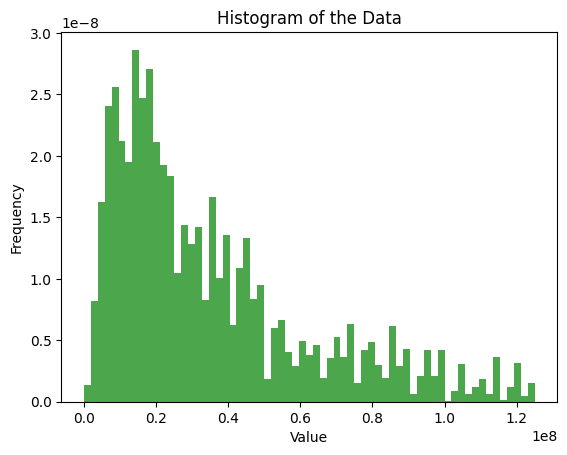

Col: Baths
Shapiro-Wilk Test:
Statistic: 0.8917292356491089
P-value: 0.0
Data does not look normally distributed (reject H0)

Kolmogorov-Smirnov Test:
Statistic: 0.9040233234293952
P-value: 0.0
Data does not look normally distributed (reject H0)

D'Agostino's K-squared Test:
Statistic: 2541.8524334218823
P-value: 0.0
Data does not look normally distributed (reject H0)


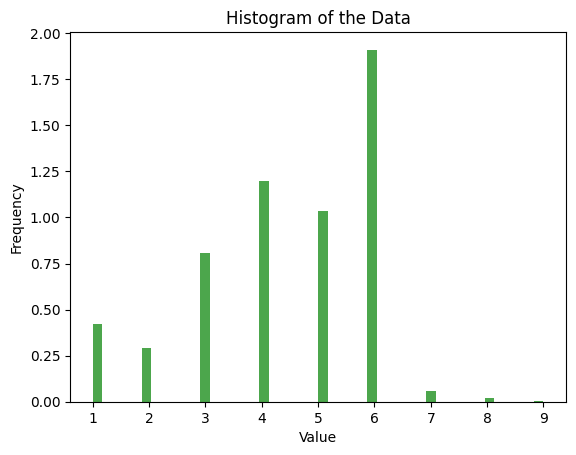

Col: Area(sqr feet)
Shapiro-Wilk Test:
Statistic: 0.8374937176704407
P-value: 0.0
Data does not look normally distributed (reject H0)

Kolmogorov-Smirnov Test:
Statistic: 1.0
P-value: 0.0
Data does not look normally distributed (reject H0)

D'Agostino's K-squared Test:
Statistic: 4603.172050606492
P-value: 0.0
Data does not look normally distributed (reject H0)


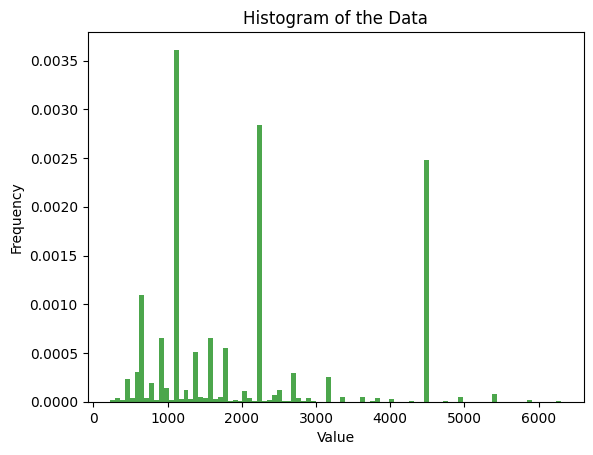

Col: Bedrooms
Shapiro-Wilk Test:
Statistic: 0.9443007111549377
P-value: 0.0
Data does not look normally distributed (reject H0)

Kolmogorov-Smirnov Test:
Statistic: 0.913608881527539
P-value: 0.0
Data does not look normally distributed (reject H0)

D'Agostino's K-squared Test:
Statistic: 334.08780297287416
P-value: 2.842859188160318e-73
Data does not look normally distributed (reject H0)


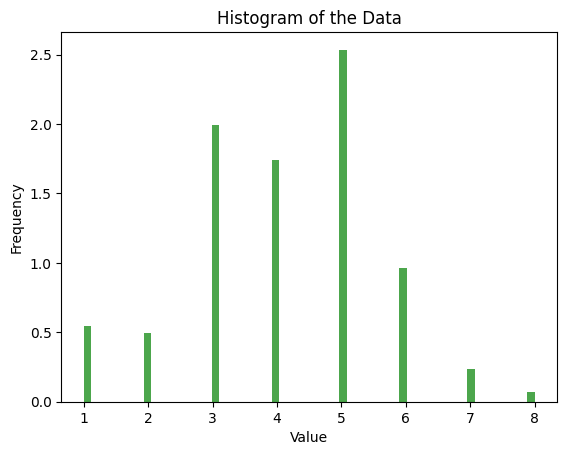

In [292]:
for col in df_clean.columns[:4]:
    print(f"Col: {col.capitalize()}")
    test_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "D'Agostino's K-squared"]
    test_p = []
    test_statistics = []

    # Generate some example data
    np.random.seed(42)

    data = df_clean[col]


    # Shapiro-Wilk Test
    stat_shapiro, p_shapiro = shapiro(data)
    test_p.append(p_shapiro)
    test_statistics.append(stat_shapiro)
    print(f'Shapiro-Wilk Test:\nStatistic: {stat_shapiro}\nP-value: {p_shapiro}')
    if p_shapiro > 0.05:
        print('Data looks normally distributed (fail to reject H0)')
    else:
        print('Data does not look normally distributed (reject H0)')

    # Kolmogorov-Smirnov Test
    stat_kstest, p_kstest = kstest(data, 'norm')
    test_p.append(p_kstest)
    test_statistics.append(stat_kstest)
    print(f'\nKolmogorov-Smirnov Test:\nStatistic: {stat_kstest}\nP-value: {p_kstest}')
    if p_kstest > 0.05:
        print('Data looks normally distributed (fail to reject H0)')
    else:
        print('Data does not look normally distributed (reject H0)')

    # D'Agostino's K-squared Test
    stat_k2, p_k2 = normaltest(data)
    test_p.append(p_k2)
    test_statistics.append(stat_k2)
    print(f'\nD\'Agostino\'s K-squared Test:\nStatistic: {stat_k2}\nP-value: {p_k2}')
    if p_k2 > 0.05:
        print('Data looks normally distributed (fail to reject H0)')
    else:
        print('Data does not look normally distributed (reject H0)')

    # Plot a histogram for visual inspection
    plt.hist(data, bins='auto', density=True, alpha=0.7, color='g')
    plt.title('Histogram of the Data')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


## **Applying One Hot Encoding**

In [293]:
one_hot_encoded = pd.get_dummies(df_clean[['city', 'province', 'town']],
                                    prefix=['city', 'province', 'town'])
one_hot_encoded = one_hot_encoded.astype(int)
df_clean = pd.concat([df_clean[['price', 'baths', 'bedrooms', 'area(sqr feet)']], one_hot_encoded], axis=1)

## **Applying Log Transformation**

In [294]:
for col in ['baths', 'bedrooms', 'area(sqr feet)', 'price']:
    df_clean[col] = np.log(df_clean[col])

## **Analysis**

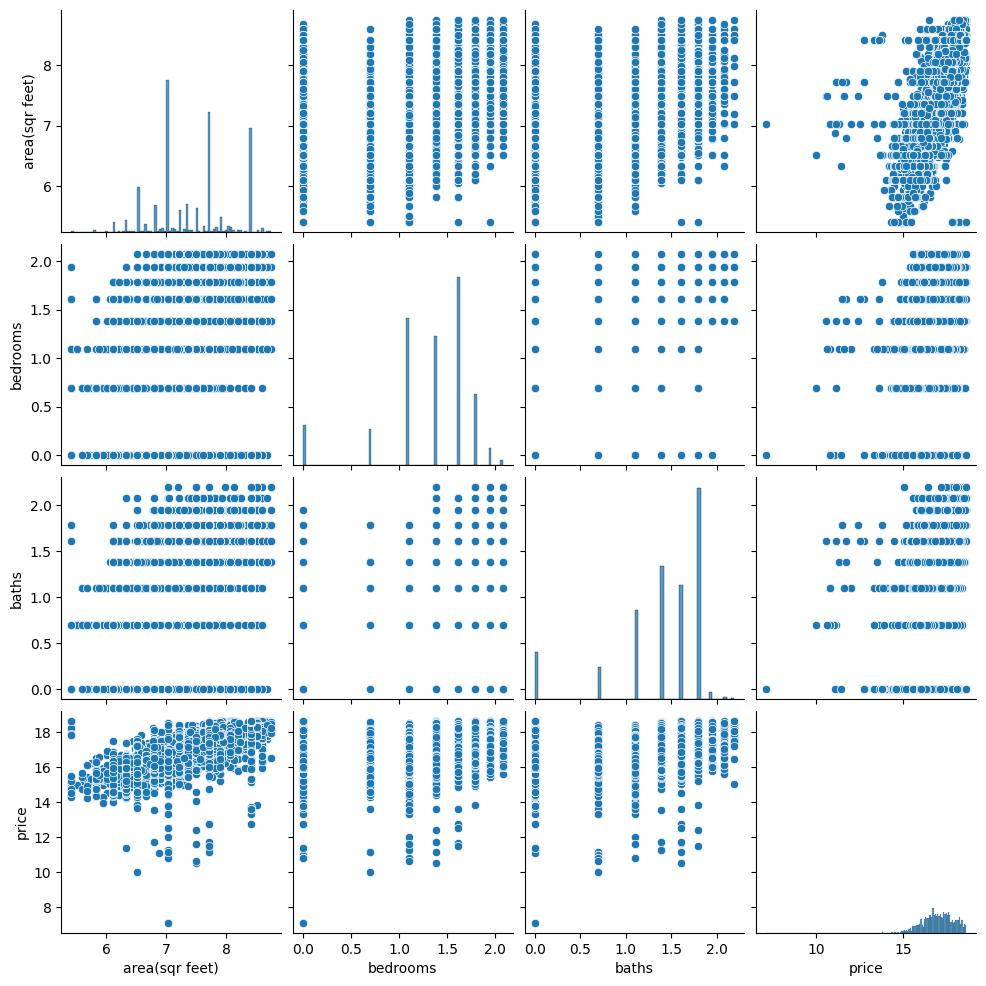

In [296]:
# pairwise plot
sns.pairplot(df_clean, vars=['area(sqr feet)', 'bedrooms', 'baths', 'price'])
plt.show()

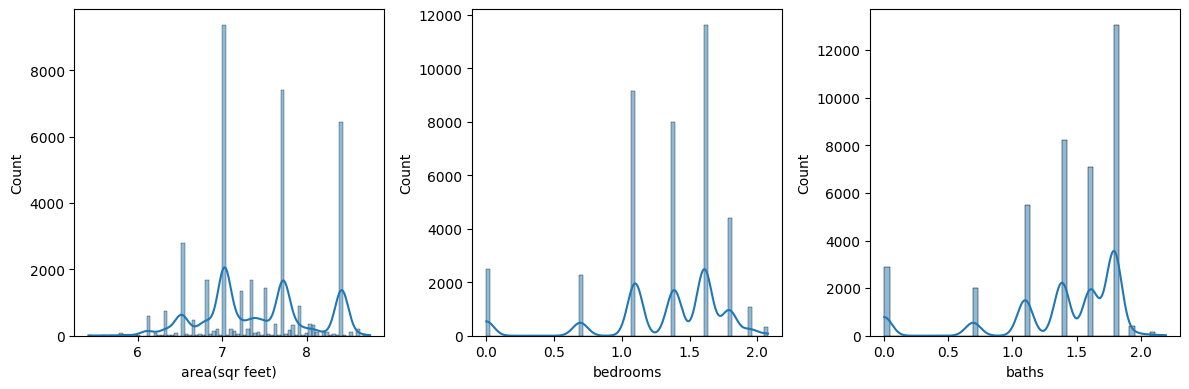

In [297]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_clean['area(sqr feet)'], kde=True)
plt.subplot(1, 3, 2)
sns.histplot(df_clean['bedrooms'], kde=True)
plt.subplot(1, 3, 3)
sns.histplot(df_clean['baths'], kde=True)
plt.tight_layout()
plt.show()

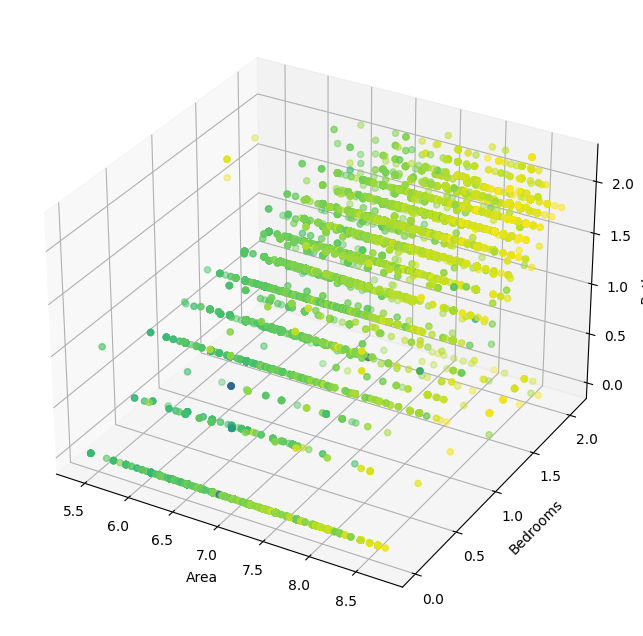

In [298]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_clean['area(sqr feet)'], df_clean['bedrooms'], df_clean['baths'], c=df_clean['price'], cmap='viridis')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Bathrooms')
plt.show()

<Axes: >

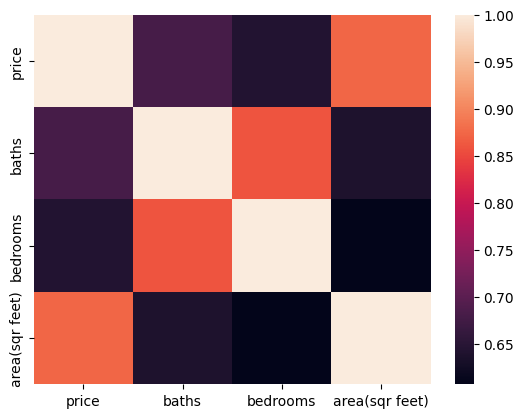

In [399]:
# correlation analysis

corr = df_clean[['price', 'baths', 'bedrooms', 'area(sqr feet)']].corr('spearman')
sns.heatmap(corr)

In [ ]:
# save cleaned data frame.
df_clean.to_csv("House_Buy_cleaned.csv", index=False)
df_clean.to_excel("House_Buy_cleaned.xlsx", index=False)